<a href="https://colab.research.google.com/github/savitskaya-om/python/blob/main/project/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist


In [ ]:
#plt.__version__

*if matplotlib version is older than 3.4*

In [ ]:
#!pip install matplotlib==3.4

**Load Data**

In [2]:
!git clone https://github.com/Kokkalo4/Kaggle-SF-Salaries 

Cloning into 'Kaggle-SF-Salaries'...
remote: Enumerating objects: 19, done.
remote: Total 19 (delta 0), reused 0 (delta 0), pack-reused 19
Unpacking objects: 100% (19/19), done.


In [3]:
sal = pd.read_csv("Kaggle-SF-Salaries/Salaries.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**Overview**

In [4]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [5]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [6]:
sal.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [7]:
sal.describe(include = ['O'])

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,Agency,Status
count,148654,148654,148049.0,148654.0,148654.0,112495.0,148654,38119
unique,110811,2159,109900.0,66555.0,84968.0,99635.0,1,2
top,Kevin Lee,Transit Operator,0.0,0.0,0.0,0.0,San Francisco,FT
freq,13,7036,875.0,66103.0,35218.0,1053.0,148654,22334


**Clean data**

Типы данных и неинформативные данные 

In [8]:
# convert numeric columns to float, text column to string instead of object.
sal[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']] = sal[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']].apply(pd.to_numeric, errors='coerce')
sal[['EmployeeName', 'JobTitle']] = sal[['EmployeeName', 'JobTitle']].astype('string', errors='ignore')

# convert year column to datetime type
sal['Year'] = pd.to_datetime(sal.Year, format='%Y').dt.year

# drop ['Notes', 'Status'] columns as there are many missing values and column 'Agency' as it is not informative (contains just one unique value)
sal.drop(columns = ['Notes','Status', 'Agency'], inplace=True)

In [9]:
sal.dtypes

Id                    int64
EmployeeName         string
JobTitle             string
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object

In [10]:
#check whether there are rows with missing values in 'TotalPay' column (not informative)
sal[sal.TotalPay == 0].describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,368.000000,76.0,364.0,364.0,361.000000,368.0,368.000000,368.000000
mean,109608.964674,0.0,0.0,0.0,6795.511856,0.0,6666.249402,2013.057065
std,18735.983397,0.0,0.0,0.0,2481.110854,0.0,2627.268462,0.489123
min,36157.000000,0.0,0.0,0.0,-33.890000,0.0,-33.890000,2011.000000
25%,106758.750000,0.0,0.0,0.0,7959.180000,0.0,7959.180000,2013.000000
50%,106850.500000,0.0,0.0,0.0,7959.180000,0.0,7959.180000,2013.000000
75%,106942.250000,0.0,0.0,0.0,7959.180000,0.0,7959.180000,2013.000000
max,148653.000000,0.0,0.0,0.0,8308.870000,0.0,8308.870000,2014.000000


In [11]:
#save part of the dataset with non-zero 'TotalPayBenefits' and  zero 'TotalPay' for potential separate analysis 
benefits_only = sal[(sal.TotalPay == 0) & (sal.TotalPayBenefits != 0)]
print(f"There are {len(benefits_only)} rows with non-zero 'TotalPayBenefits' and  zero 'TotalPay'")
benefits_only.head()

There are 338 rows with non-zero 'TotalPayBenefits' and  zero 'TotalPay'


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
70877,70878,Roland Baylon,Deputy Court Clerk II,0.0,0.0,0.0,3728.05,0.0,3728.05,2012
70927,70928,Felecia Phillips,Registered Nurse,0.0,0.0,0.0,3618.13,0.0,3618.13,2012
70928,70929,Robert Giannini,Painter,0.0,0.0,0.0,3614.56,0.0,3614.56,2012
70932,70933,Nelly Kuan,Senior Eligibility Worker,0.0,0.0,0.0,3610.32,0.0,3610.32,2012
70933,70934,William Mathews,Transit Power Line Worker,0.0,0.0,0.0,3608.42,0.0,3608.42,2012


In [12]:
#remove rows with zero 'TotalPay' values from main dataframe
sal.drop(sal[sal.TotalPay == 0].index, inplace = True)

Пропущенные значения

In [13]:
print(f"sal.BasePay null values: {sal.BasePay.isnull().sum()}\nsal.OvertimePay null values: {sal.OvertimePay.isnull().sum()}\n \
sal.OtherPay null values: {sal.OtherPay.isnull().sum()}\nsal.Benefits null values: {sal.Benefits.isnull().sum()}\nsal.TotalPayBenefits null values: {sal.TotalPayBenefits.isnull().sum()}")

sal.BasePay null values: 317
sal.OvertimePay null values: 0
 sal.OtherPay null values: 0
sal.Benefits null values: 36156
sal.TotalPayBenefits null values: 0


In [14]:
#fill missing "BasePay" values 
sal.loc[sal.BasePay.isnull(),"BasePay"] = sal.loc[sal.BasePay.isnull(), "TotalPay"] - sal.loc[sal.BasePay.isnull(),"OvertimePay"] - sal.loc[sal.BasePay.isnull(), "OtherPay"]
#fill missing "Benefits" values 
sal.loc[sal.Benefits.isnull(),"Benefits"] = sal.loc[sal.Benefits.isnull(), "TotalPayBenefits"] - sal.loc[sal.Benefits.isnull(),"TotalPay"]

In [70]:
sal.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148286.000000,148286.000000,148286.000000,148286.000000,148286.000000,148286.000000,148286.000000,148286.000000
mean,74239.942314,66217.654219,5078.495624,3657.723984,18954.653363,74953.873827,93908.527191,2012.521317
std,42919.899896,42813.312492,11465.676891,8064.453244,17175.189711,50441.977909,62721.241666,1.118341
min,1.000000,-166.010000,-0.010000,-7058.590000,-13.800000,-618.130000,-618.130000,2011.000000
25%,37075.250000,33272.910000,0.000000,0.000000,0.000000,36679.020000,44691.035000,2012.000000
50%,74171.500000,64957.515000,0.000000,819.535000,23373.810000,71553.000000,92571.480000,2013.000000
75%,111530.750000,94691.010000,4680.157500,4254.895000,33492.905000,105967.057500,133004.167500,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [16]:
print(f"NaN values in modified dataset:\n{sal.isnull().sum()}")

NaN values in modified dataset:
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64


Дубликаты

In [17]:
print(f"There are {sal.duplicated().sum()} duplicated values in the dataset")

There are 0 duplicated values in the dataset


**Data Analysis**

Добавим поле 'Profession', значения в котором будут определяться на основании  'JobTitle'

In [89]:
sal.JobTitle = sal.JobTitle.str.lower()

In [90]:
sal["Profession"] = "TBD"

In [78]:
print(f"Всего в датасете {sal['JobTitle'].nunique()} уникальных Job Titles.\n30 наиболее частых:")
sal['JobTitle'].value_counts().head(25)

Всего в датасете 1633 уникальных Job Titles.
30 наиболее частых:


transit operator                9381
special nurse                   5788
registered nurse                4953
custodian                       3208
firefighter                     3147
recreation leader               2660
deputy sheriff                  2608
public svc aide-public works    2516
police officer 3                2417
patient care assistant          1944
public service trainee          1655
attorney (civil/criminal)       1502
police officer                  1472
porter                          1464
general laborer                 1399
gardener                        1183
police officer 2                1141
parking control officer         1132
library page                    1107
senior clerk                    1063
senior clerk typist             1049
sergeant 3                      1047
clerk                            980
eligibility worker               980
emt/paramedic/firefighter        917
Name: JobTitle, dtype: Int64

Сделаем разметку Job Title -> Profession для наиболее распространенных job titles из списка выше  

In [91]:
profession_dict = {"police":"police", "fire" : "fire", "medical": "medicine", "transit": "transportation", "nurs":"medicine", "patient care assistant": "medicine", "custodian": "custodian", "attorney": "attorney", "sheriff": "sheriff", "clerk": "clerk", 
                   "public svc" :"public service jobs", "public service":"public service jobs", "sergeant": "police", "recreation leader": "recreation leader"} 

In [92]:
def def_prof(): 
  """function which fills in column 'Profession' in the dataset"""
  for k,v in profession_dict.items():
      sal.loc[sal['JobTitle'].str.contains(k), "Profession"] = v

In [93]:
def_prof()

Проверим, какие Job Title осталичь неразмеченными

In [82]:
sal.loc[sal.Profession == "TBD", 'JobTitle'].value_counts().head(30)

porter                                 1464
general laborer                        1399
gardener                               1183
parking control officer                1132
library page                           1107
eligibility worker                      980
stationary engineer                     885
senior eligibility worker               875
protective services worker              822
museum guard                            820
senior administrative analyst           805
school crossing guard                   712
truck driver                            707
food service worker                     700
engineer                                629
ps aide to prof                         626
publ svc aide-asst to prof              574
manager iii                             568
automotive mechanic                     562
mental health rehabilitation worker     559
librarian 1                             530
physician specialist                    528
senior physician specialist     

In [106]:
profession_dict.update({"publ svc": "Public Service jobs", "ps aide": "Public Service jobs", "eligibility worker": "eligibility worker", "engineer":"engineer"})
def_prof()

In [123]:
print(f"Размечено {sal[~(sal.Profession == 'TBD')].Profession.count()} строк, не размечено -   {sal[sal.Profession == 'TBD'].Profession.count()} ")

Размечено 70787 строк, не размечено -   77499 


In [94]:
sal.loc[sal['JobTitle'].str.contains("porter|general laborer|gardener"), "JobTitle"].value_counts()

porter                                  1464
general laborer                         1399
gardener                                1183
court reporter                           167
general laborer supervisor 1             137
apprentice gardener                       87
general laborer supervisor i              46
porter supervisor 1                       32
porter assistant supervisor               16
porter supervisor i                       11
court reporter coordinator                 3
assistant court reporter coordinator       1
Name: JobTitle, dtype: Int64

Проверим, менялось ли распределение зарплат от года к году в 2011 - 2014

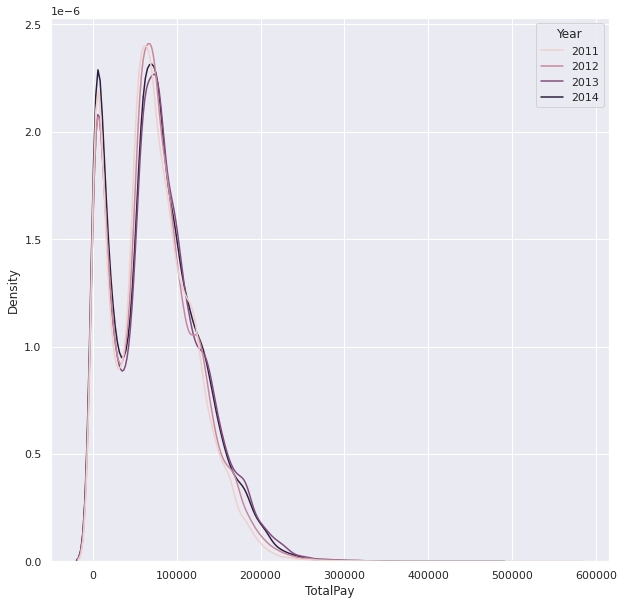

In [67]:
sns.kdeplot(data=sal, x="TotalPay", hue="Year")

Видно, что распредение от года меняется несильно, поэтому для простоты анализ зарплаты в зависимости от профессии будем проводить без разбивки по годам. Также из графика плотности распределения видно, что распределение величины TotalPay бимодально: один пик около 0, второй - ~70k

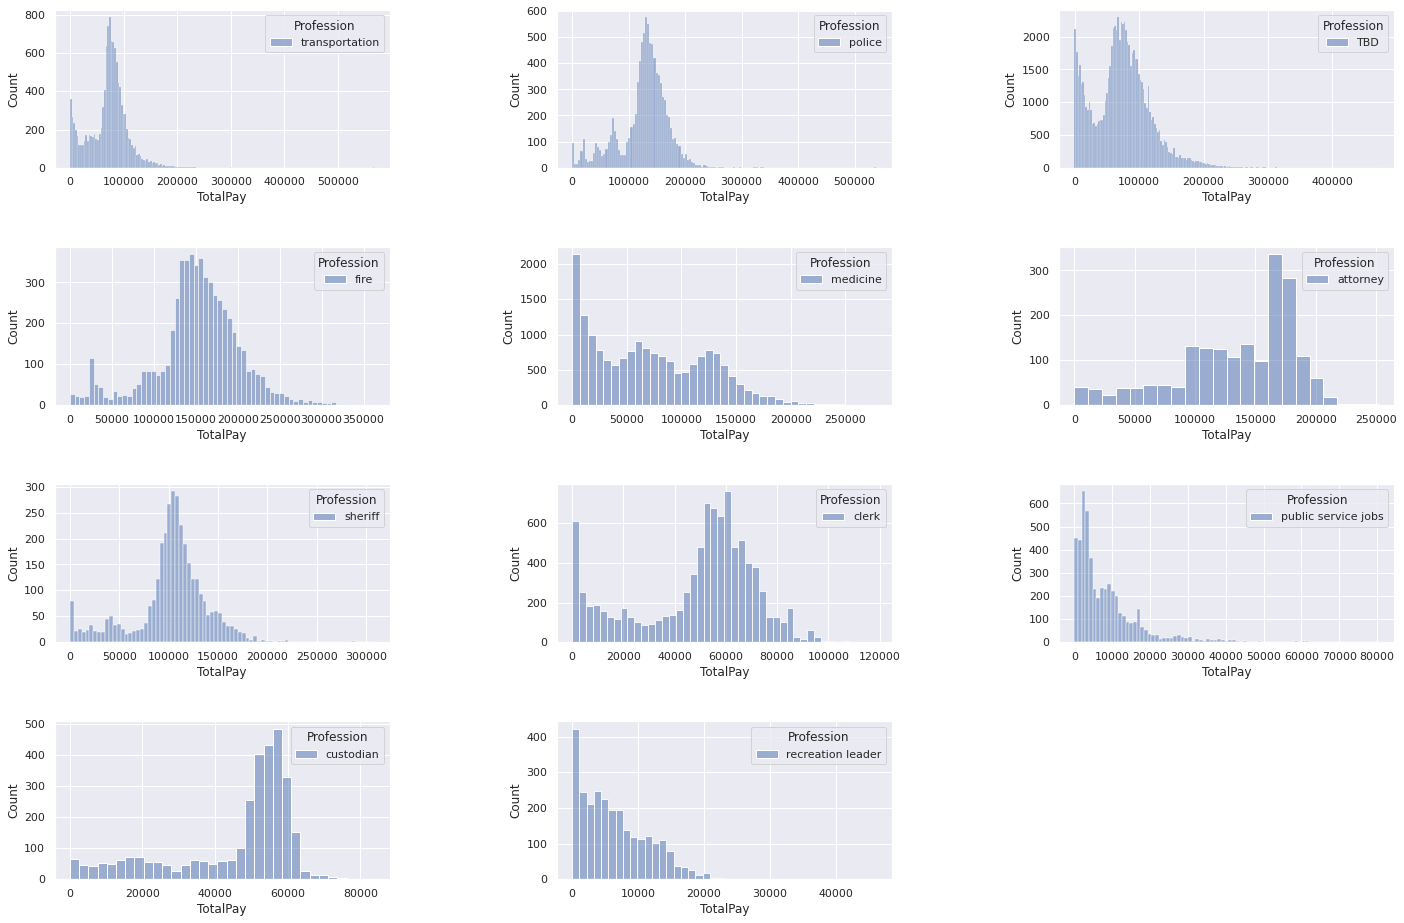

In [95]:
plt.figure(figsize=(24,16))
for i, prof in enumerate(sal.Profession.unique()):   
  plt.subplot(4,3,i+1)
  sns.histplot(data=sal.loc[sal.Profession.str.contains(prof)], x="TotalPay", hue="Profession")
plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [136]:
sal_wide = pd.pivot_table (sal, index = 'Id', values = 'TotalPay', columns = 'Profession',  aggfunc=np.sum)
sal_wide.describe()

Profession,TBD,attorney,clerk,custodian,fire,medicine,police,public service jobs,recreation leader,sheriff,transportation
count,77499.000000,1840.000000,9321.000000,3208.000000,5870.000000,17509.000000,9574.000000,5222.000000,2660.000000,3532.000000,12051.000000
mean,72794.730219,135990.361413,48251.942425,45533.580916,151918.380065,70547.555755,126678.749560,8286.342461,6490.308737,102592.510906,71724.200988
std,43767.599637,49646.944200,23719.213171,17123.862850,51018.841869,52624.917201,42869.677681,8622.209884,5217.702299,38214.971678,35614.295090
min,-618.130000,13.350000,4.750000,41.950000,5.800000,3.280000,21.980000,15.830000,15.500000,24.760000,0.300000
25%,45007.580000,105170.375000,35193.300000,37628.810000,130342.780000,21183.260000,112965.025000,2552.747500,2213.772500,91406.965000,53987.090000
50%,72581.990000,148434.400000,54502.010000,52498.850000,153763.130000,64622.790000,132735.855000,5402.745000,5398.820000,105981.900000,75108.760000
75%,97857.265000,175970.350000,64237.110000,56933.155000,181560.332500,114818.610000,152238.577500,10971.677500,9953.312500,121882.192500,90496.865000
max,471952.640000,252221.060000,118781.480000,83846.770000,362844.660000,278569.210000,538909.280000,80393.020000,46204.650000,308434.840000,567595.430000


In [39]:
sal.loc[sal["Benefits"]>0,["JobTitle","Profession"]].value_counts().head(10)

JobTitle                      Profession         
transit operator              transportation         6976
special nurse                 medicine               4142
registered nurse              medicine               3724
public svc aide-public works  Public Service jobs    2481
police officer 3              police                 2376
custodian                     custodian              2373
firefighter                   fire                   2345
patient care assistant        medicine               1928
deputy sheriff                sheriff                1914
recreation leader             recreation leader      1899
dtype: int64

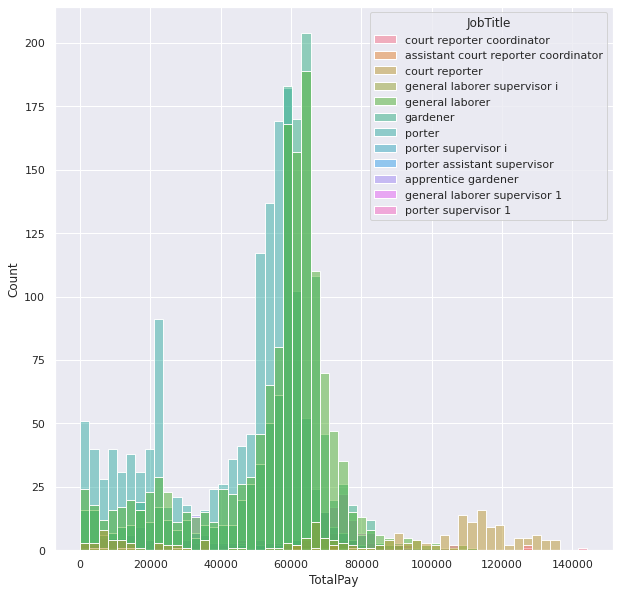

In [44]:
sns.set(rc={'figure.figsize':(10,10)})
sns.histplot(data=sal.loc[sal.JobTitle.str.lower().str.contains("porter|general laborer|gardener")], x="TotalPay", hue="JobTitle")

In [124]:
sal[sal.JobTitle.str.lower().str.contains("court")]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Profession
398,399,WILLIAM SIFFERMANN,"chief probation officer, juvenile court",191319.45,0.0,0.00,0.00,191319.45,191319.45,2011,TBD
803,804,TERRENCE YUEN,court executive officer,176028.39,0.0,0.00,0.00,176028.39,176028.39,2011,TBD
1803,1804,MELISSA TAPPLY,senior court staff attorney,110800.24,0.0,45333.73,0.00,156133.97,156133.97,2011,attorney
2135,2136,REBECCA WIGHTMAN,court commissioner,151387.60,0.0,0.00,0.00,151387.60,151387.60,2011,TBD
2370,2371,ARLENE BORICK,court commissioner,122274.60,0.0,25619.61,0.00,147894.21,147894.21,2011,TBD
...,...,...,...,...,...,...,...,...,...,...,...
120990,120991,Derek J Hom,"sprv prob ofc, juv court",103241.03,0.0,0.00,33977.02,103241.03,137218.05,2014,TBD
130320,130321,Rosario A Carbajal,court alternative specialist 1,68159.03,0.0,1040.00,28986.49,69199.03,98185.52,2014,TBD
130321,130322,Alfredo Bojorquez,court alternative specialist 1,68159.01,0.0,1040.00,28986.49,69199.01,98185.50,2014,TBD
132378,132379,Tamara B Aparton,court alternative specialist 1,62293.82,0.0,0.00,28102.97,62293.82,90396.79,2014,TBD


In [47]:
sal.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148286.000000,148286.000000,148286.000000,148286.000000,148286.000000,148286.000000,148286.000000,148286.000000
mean,74239.942314,66217.654219,5078.495624,3657.723984,18954.653363,74953.873827,93908.527191,2012.521317
std,42919.899896,42813.312492,11465.676891,8064.453244,17175.189711,50441.977909,62721.241666,1.118341
min,1.000000,-166.010000,-0.010000,-7058.590000,-13.800000,-618.130000,-618.130000,2011.000000
25%,37075.250000,33272.910000,0.000000,0.000000,0.000000,36679.020000,44691.035000,2012.000000
50%,74171.500000,64957.515000,0.000000,819.535000,23373.810000,71553.000000,92571.480000,2013.000000
75%,111530.750000,94691.010000,4680.157500,4254.895000,33492.905000,105967.057500,133004.167500,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In [48]:
sal[sal.Profession == "TBD"].describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,78641.000000,78641.000000,78641.000000,78641.000000,78641.000000,78641.000000,78641.000000,78641.000000
mean,74518.876871,66660.942265,2649.058203,2385.870931,19480.047959,71695.871399,91175.919358,2012.519983
std,42398.935406,41135.050155,7288.658899,7042.334044,17081.706308,44341.588314,57203.042848,1.119471
min,4.000000,0.000000,-0.010000,-7058.590000,-13.800000,-618.130000,-618.130000,2011.000000
25%,37045.000000,38985.560000,0.000000,0.000000,0.000000,42080.000000,50635.560000,2012.000000
50%,74677.000000,67250.990000,0.000000,384.000000,25003.720000,71968.200000,92487.330000,2013.000000
75%,111934.000000,90693.020000,1333.210000,2047.330000,32907.430000,97461.000000,126502.950000,2014.000000
max,148654.000000,318835.490000,146415.320000,342802.630000,96570.660000,471952.640000,510732.680000,2014.000000


In [132]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import f1_score
# from nltk.corpus import stopwords
# from sklearn.feature_extraction.text import TfidfVectorizer
# import nltk
# from sklearn import tree

# job_list = sal.loc[sal.Profession == "TBD", 'JobTitle'].str.lower().str.split().tolist()
# job_list = [item for sublist in job_list for item in sublist] #flatten list
# fdist = FreqDist(job_list)
# # fdist.most_common(30)

Outlires

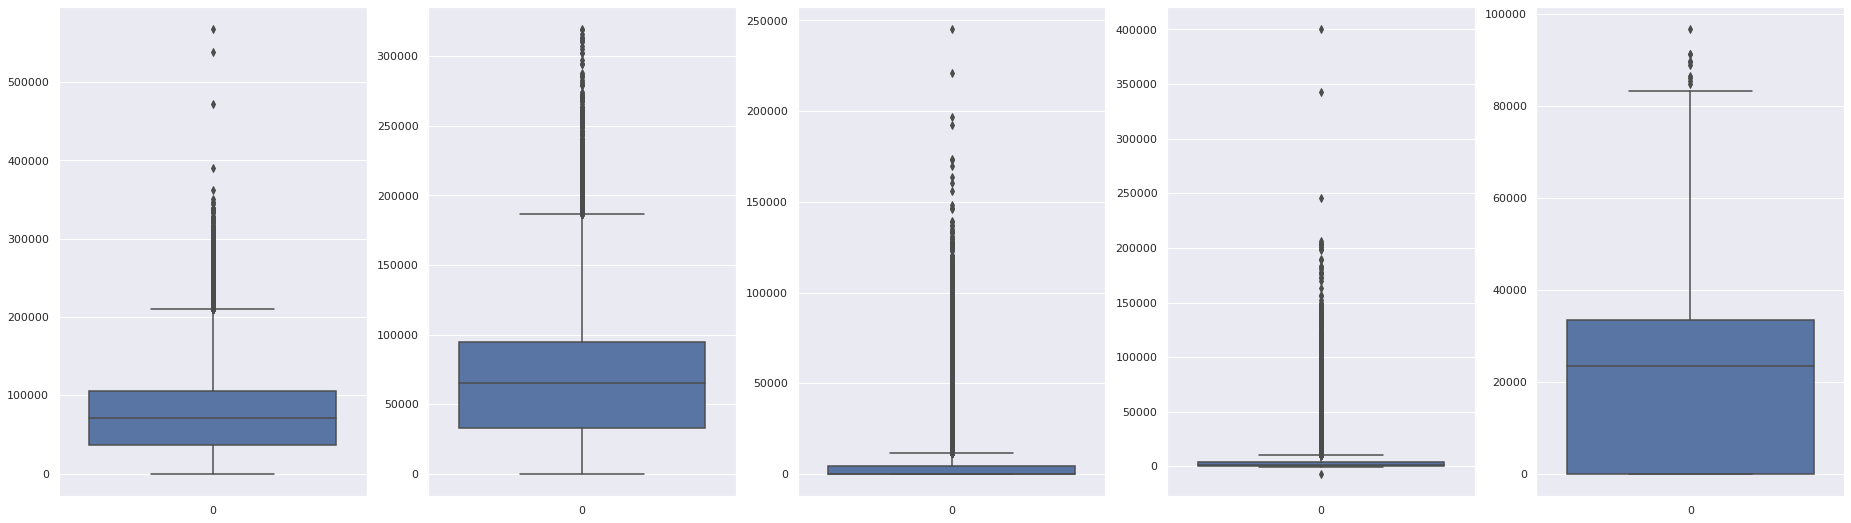

In [96]:
fig, axes = plt.subplots(1, 5, figsize=(32, 9))

sns.boxplot(data = sal['TotalPay'], ax=axes[0])
sns.boxplot(data = sal['BasePay'], ax=axes[1])
sns.boxplot(data = sal['OvertimePay'], ax=axes[2])
sns.boxplot(data = sal['OtherPay'], ax=axes[3])
sns.boxplot(data = sal['Benefits'], ax=axes[4])
plt.show()

In [98]:
# outliers are values greater than (Q3+1.5*IQR)
Q1 = np.percentile(sal['TotalPay'], 25, interpolation = 'midpoint')
Q3 = np.percentile(sal['TotalPay'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

In [99]:
# Upper bound
upper = np.where(sal['TotalPay'] >= (Q3+1.5*IQR))
# lower bound
lower = np.where(sal['TotalPay'] <= (Q3-1.5*IQR))

In [105]:
sal.nlargest(5, 'TotalPay')

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Profession
0,1,NATHANIEL FORD,general manager-metropolitan transit authority,167411.18,0.00,400184.25,0.00,567595.43,567595.43,2011,transportation
1,2,GARY JIMENEZ,captain iii (police department),155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011,police
110531,110532,David Shinn,deputy chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,TBD
110532,110533,Amy P Hart,asst med examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,TBD
36159,36160,Gary Altenberg,"lieutenant, fire suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,fire


In [62]:
idx1 = (sal.iloc[upper]).index
idx2 = sal[sal.Profession == "TBD"].index
idx = idx2.intersection(idx1).values

In [89]:
sal["Profession"].loc[idx1].value_counts()

TBD               429
fire              369
medicine           86
police             38
attorney           18
sheriff             8
transportation      6
Name: Profession, dtype: int64

In [100]:
sal[["Profession","Year"]].groupby(["Year", "Profession"]).Profession.count()

Year  Profession         
2011  Public Service jobs     1335
      TBD                    19266
      attorney                 589
      clerk                   2394
      custodian                796
      fire                    1459
      medicine                3788
      police                  2567
      sheriff                  905
      transportation          3057
2012  Public Service jobs     1634
      TBD                    19413
      attorney                 413
      clerk                   2401
      custodian                824
      fire                    1449
      medicine                4515
      police                  2308
      sheriff                  882
      transportation          2902
2013  Public Service jobs     1822
      TBD                    19766
      attorney                 419
      clerk                   2322
      custodian                787
      fire                    1453
      medicine                4593
      police                 

In [ ]:
sns.boxplot(sal.loc[sal.Profession == "police", 'TotalPay'])
plt.show()


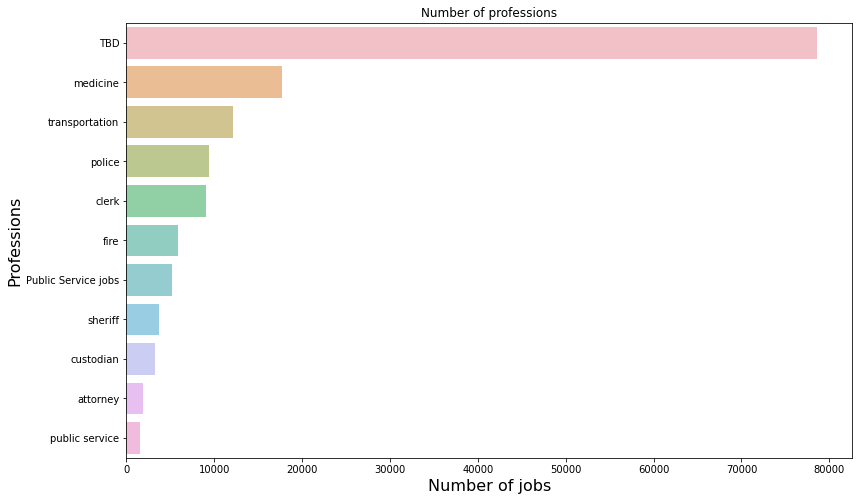

In [65]:
plt.figure(figsize=(13,8))
sectors = sal['Profession'].value_counts()[0:30]
sns.barplot(y=sectors.index, x=sectors.values, alpha=0.6)
plt.xlabel('Number of jobs', fontsize=16)
plt.ylabel("Professions", fontsize=16)
plt.title("Number of professions")
plt.show();

In [ ]:
#heatmap for dataset
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(sal[["Profession", "TotalPay"]], annot=True, linewidths=.5, fmt= 'd',ax=ax)

In [247]:
sal.loc[sal.Profession == "police", 'TotalPay']

1         538909.28
2         335279.91
11        297608.92
15        286213.86
25        267992.59
            ...    
148312       309.90
148409       242.66
148437       212.39
148506       134.78
148561        59.59
Name: TotalPay, Length: 9366, dtype: float64

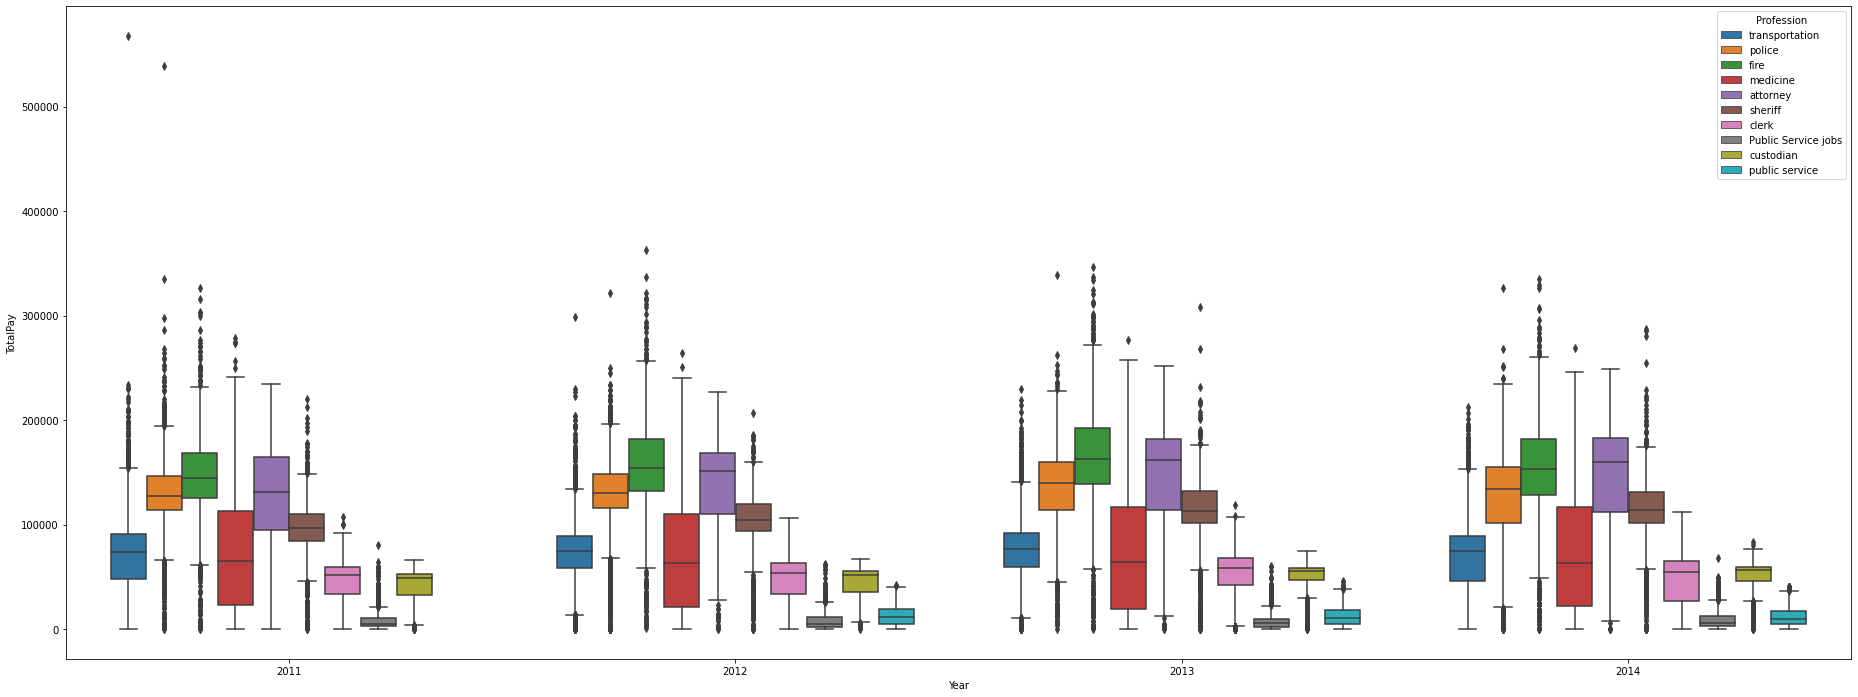

In [66]:
fig, axes = plt.subplots(1, 1, figsize=(32, 12))

ax = sns.boxplot(x="Year", y="TotalPay", data=sal[~(sal.Profession == "TBD")],
                 hue = "Profession")
plt.show()

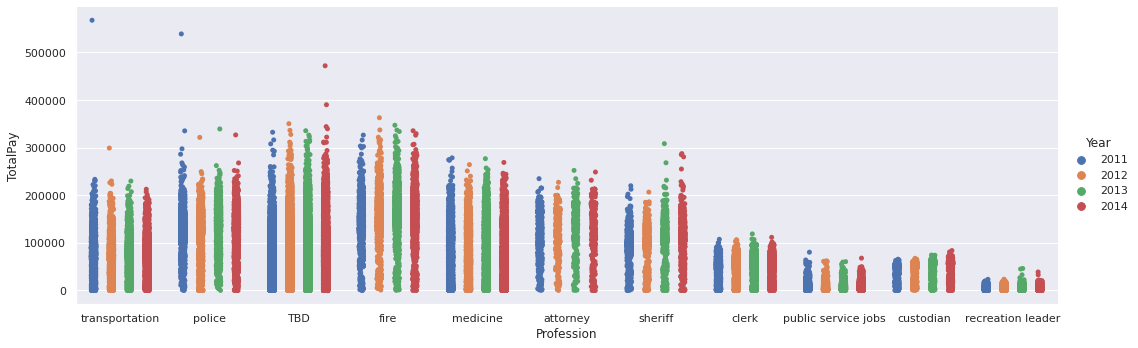

In [148]:
sns.catplot(x="Profession", y="TotalPay",  data=sal, aspect = 3, hue = "Year", dodge=True)

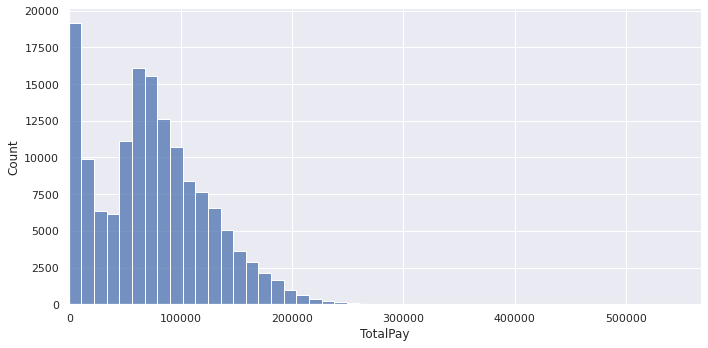

In [71]:
sns.displot(sal["TotalPay"], kde=False, bins = 50, aspect=2)
plt.margins(x=0)

In [ ]:
# Count Plot показывает количество наблюдений
ax = sns.catplot(x='Year', 
            data=sal, 
            kind='count', 
            height=6, 
            aspect=2
           );  
#plt.title('5. Count Plot - Продажи по продуктам', size=15, color='g', weight='bold');

In [ ]:
SumByYear = sal[['TotalPay','Year']].groupby('Year').sum().reset_index()
CountByYear = sal[['TotalPay','Year']].groupby('Year').count().reset_index()
CountByYear

,Year,TotalPay
0,2011-01-01,36156
1,2012-01-01,36741
2,2013-01-01,37318
3,2014-01-01,38071


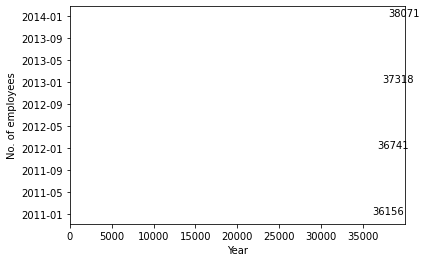

In [ ]:
# Define Data
year = CountByYear.Year
Count = CountByYear["TotalPay"]

# Plot horizontal bar chart

bars = plt.barh( year, Count)

# To get data labels

for  bar in bars:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
    
# Define axes labels

plt.xlabel("Year")
plt.ylabel("No. of employees")

# Display a bar chart
    
plt.show()

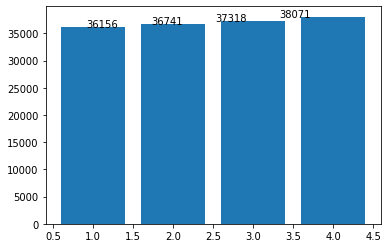

In [ ]:
x = [1, 2, 3, 4] 
y = CountByYear["TotalPay"]

bars = plt.bar(x, y)

for i in range(len(y)):
        plt.text(bars[i].get_width()*(i+1),y[i],y[i], ha = 'center')

plt.show()

In [ ]:
for index, row in groupedvalues.iterrows():
  print(row.Count)

36156
36741
37318
38071


In [ ]:
sal.Year.value_counts().index

DatetimeIndex(['2014-01-01', '2013-01-01', '2012-01-01', '2011-01-01'], dtype='datetime64[ns]', freq=None)

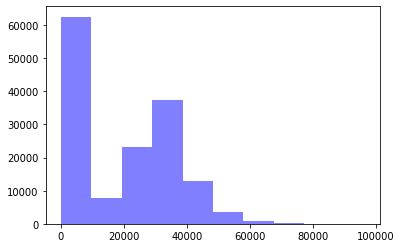

In [ ]:
plt.hist(sal.Benefits,  facecolor='blue', alpha=0.5)
plt.show()

1.	Как со временем менялись зарплаты между разными группами (группировка по Department - fire, medicine, police)? (максимальная, медианная, средняя)
2.	Как распределяются базовая оплата, сверхурочная работа и льготы между разными группами? Нужно построить диаграммы по распределению со временем для каждого департамента по базовым, сверхурочным и льготам
3.	Как распределяется бюджет на разные группы (department) с течением времени?
4.	Какое количество людей в каждом департаменте? 
5.	Какое количество с разным уровнем дохода? (гистограмма с шагом в 5к) 
6.	На базе линейной регрессии постройте прогноз по тому, какие будут закупке в следующий год по каждому департаменту


In [23]:
text_transformer = TfidfVectorizer()

In [24]:
text = text_transformer.fit_transform(sal['JobTitle'].str.lower())

In [25]:
text

<148286x854 sparse matrix of type '<class 'numpy.float64'>'
	with 371780 stored elements in Compressed Sparse Row format>

**Conclusions**